# Pymaceuticals Inc.
---

### Analysis

- Three observations or inferences that can be made from the data: 
     1. Of all the drug regimens, Ramicane and Capomullin reduces the size of the tumors the most. 
     2. The distribution of females and males in the study are in line with each other. 
     3. Based on the regression and correlations there is a strong relationship with weight and tumor volume. 
        As the weight increases the average tumor volume also increases. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = study_results.merge(mouse_metadata, on='Mouse ID').sort_values(['Timepoint','Metastatic Sites'])

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID'].isin(dup_mice)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = clean_df.groupby('Drug Regimen')

tumor_mean = summary_stats['Tumor Volume (mm3)'].mean()
tumor_med = summary_stats['Tumor Volume (mm3)'].median()
tumor_var = summary_stats['Tumor Volume (mm3)'].var()
tumor_stddev = summary_stats['Tumor Volume (mm3)'].std()
tumor_stderr = summary_stats['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame ({'mean': tumor_mean, 'median': tumor_med, 'var': tumor_var, 
                               'std': tumor_stddev, 'sem': tumor_stderr})
summary_stats_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

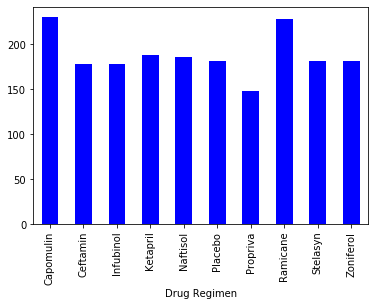

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_DataFrame = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()

pandas_DataFrame.plot(kind = 'bar', 
        x = 'Drug Regimen', 
        y = 'Timepoint', 
        color = 'blue')

plt.show()


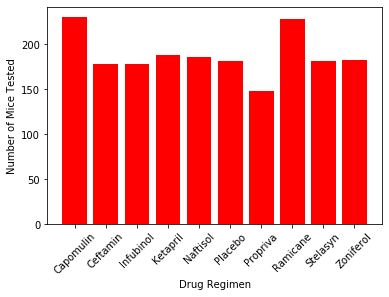

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
df = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()

# Set axis
x_axis = df.index.values
y_axis = df.values

# Create bar chart and set labels
plt.bar(x_axis, y_axis, color= 'r', align='center')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

plt.xticks(rotation='45')

plt.show()


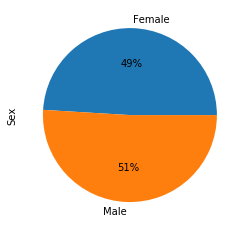

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate distribution of male and female
mice_sex = clean_df.groupby('Sex')['Sex'].count()
mice_sex

# Defining colors for the pie chart
colors = ['blue', 'orange']

# Plotting the pie chart from the above data frame
mice_sex.plot(kind = 'pie', autopct = '%1.0f%%')


([<matplotlib.patches.Wedge at 0x7f8c5b347050>,
 [Text(-0.7320888280116858, -0.8210030133321538, 'Female'),
  Text(0.7320888280116863, 0.8210030133321532, 'Male')],
 [Text(-0.399321178915465, -0.447819825453902, '49.0%'),
  Text(0.3993211789154652, 0.4478198254539017, '51.0%')])

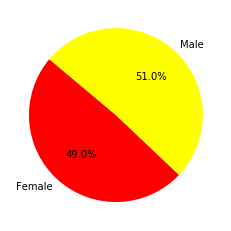

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Setting x axis and defining colors 
sex = mice_sex.index
colors = ['red', 'yellow']

# Creating the pie chart based upon data 
plt.pie(mice_sex, labels=mice_sex.index, colors=colors, autopct="%1.1f%%", startangle=140)


## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

fin_tumor_vol = clean_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
fin_tumor_df = fin_tumor_vol.reset_index()



In [12]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
fin_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treat_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    fin_tumor_vol = fin_tumor_df.loc[fin_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    fin_tumor_vol_list.append(fin_tumor_vol)
    
    
    quartiles = fin_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f'--------------------------------------------------')
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range {drug} is: {iqr}")
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f'--------------------------------------------------')
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    

--------------------------------------------------
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range Capomulin is: 7.781863460000004
--------------------------------------------------
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
--------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range Ramicane is: 9.098536719999998
--------------------------------------------------
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
--------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range Infubinol is: 11.477135160000003
--------------------------------------------------
Values below 36.83290494999999 could be outliers.
Va

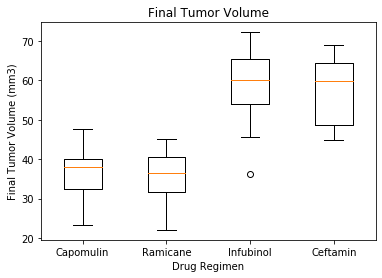

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, fin_tumor_vol = plt.subplots()
fin_tumor_vol.boxplot(fin_tumor_vol_list, labels=treat_list)

# Set label
fin_tumor_vol.set_title('Final Tumor Volume')
fin_tumor_vol.set_xlabel('Drug Regimen')
fin_tumor_vol.set_ylabel('Final Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

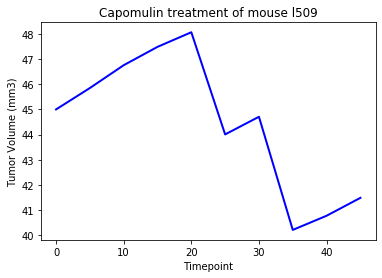

In [14]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

mousel509 = Capomulin_df.loc[Capomulin_df['Mouse ID']=='l509']

x = mousel509['Timepoint']
y = mousel509['Tumor Volume (mm3)']

plt.plot(x, y, color='blue', linewidth=2, markersize=15)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


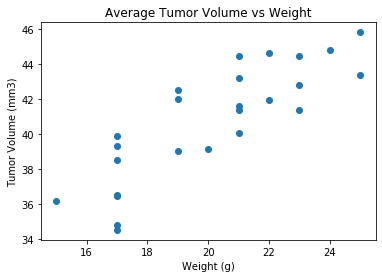

In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate mean weight and volume based on mouse ID
capomulin_data = Capomulin_df.groupby('Mouse ID').mean()
weight_avg = capomulin_data['Weight (g)']
vol_avg = capomulin_data['Tumor Volume (mm3)']

# Generate a scatter plot and set labels
plt.scatter(weight_avg, vol_avg)
plt.title('Average Tumor Volume vs Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)') 

plt.show()




## Correlation and Regression

Text(0, 0.5, 'Tumor Volume (mm3)')

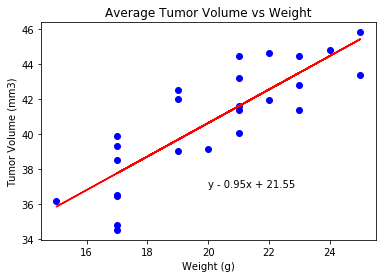

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# set x and y values 
x_values = weight_avg
y_values = vol_avg

# Calculate the regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y - '+ str(round(slope, 2)) + 'x + ' + str(round(intercept,2))

# Generate scatter chart 
plt.scatter(x_values, y_values, marker = 'o', facecolors='blue')

# Plot line 
plt.plot(x_values, regress_values, 'r')
plt.annotate(line_eq,(20,37))

# Define Titles and x,y values 
plt.title('Average Tumor Volume vs Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)') 

